# Module 3: Principal componentent analysis

In this lab you will learn about **Principal componentent analysis** (PCA).
It is a linear transformation that transforms data points into feature space representation,
which has the following properties:

+ Exactly the **same** dimension as the original data space
+ Reconstruction of data points is optimal in the mean-square-error sense.
+ Principal components are sorted by "effectiveness" at capturing variance.
+ Dimensionality reduction can be done simply by truncating (down selecting the number of) principal components.

For this session, we are going to use **red wine quality** dataset for principal componentent analysis 
and transform its data space into feature space with top 5 principal components.

sklearn API reference:

+ [sklearn.decomposition.PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)


**Note:** Previously you saw PCA in the 8610 (Stat/Math) course.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import os, sys
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## Load dataset

In [2]:
# Dataset location
DATASET = '/dsa/data/all_datasets/wine-quality/winequality-red.csv'
assert os.path.exists(DATASET)

# Load and shuffle
dataset = pd.read_csv(DATASET, sep=';').sample(frac = 1).reset_index(drop=True)

X = np.array(dataset.iloc[:, :-1])
# X = scale(X_wo_scale, with_std = False)
X_centered = scale(X, with_std = False)

y = np.array(dataset.quality)



print(dataset.shape)

# dataset.describe()


pd.DataFrame(X_centered, columns = dataset.columns[:-1]).describe()


(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,6.176700e-16,3.318866e-17,3.943757e-17,-1.666376e-16,1.617773e-17,-5.599023e-16,1.279777e-15,4.554761e-17,4.396455e-16,-1.077590e-16,-1.693038e-15
std,1.741096e+00,1.790597e-01,1.948011e-01,1.409928e+00,4.706530e-02,1.046016e+01,3.289532e+01,1.887334e-03,1.543865e-01,1.695070e-01,1.065668e+00
min,-3.719637e+00,-4.078205e-01,-2.709756e-01,-1.638806e+00,-7.546654e-02,-1.487492e+01,-4.046779e+01,-6.676679e-03,-5.711132e-01,-3.281488e-01,-2.022983e+00
25%,-1.219637e+00,-1.378205e-01,-1.809756e-01,-6.388055e-01,-1.746654e-02,-8.874922e+00,-2.446779e+01,-1.146679e-03,-1.011132e-01,-1.081488e-01,-9.229831e-01
50%,-4.196373e-01,-7.820513e-03,-1.097561e-02,-3.388055e-01,-8.466542e-03,-1.874922e+00,-8.467792e+00,3.320826e-06,-1.113196e-03,-3.814884e-02,-2.229831e-01
75%,8.803627e-01,1.121795e-01,1.490244e-01,6.119450e-02,2.533458e-03,5.125078e+00,1.553221e+01,1.088321e-03,8.888680e-02,7.185116e-02,6.770169e-01
max,7.580363e+00,1.052179e+00,7.290244e-01,1.296119e+01,5.235335e-01,5.612508e+01,2.425322e+02,6.943321e-03,6.988868e-01,1.341851e+00,4.477017e+00


In [3]:
pd.DataFrame(X_centered, columns = dataset.columns[:-1]).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.980363,-0.137821,0.129024,0.061194,-0.014467,-5.874922,-20.467792,0.001653,0.028887,0.091851,-0.222983
1,-1.219637,0.152179,-0.200976,-0.638806,-0.012467,0.125078,4.532208,0.000103,0.068887,-0.138149,-0.922983
2,0.680363,0.257179,-0.030976,-0.838806,-0.009467,-5.874922,-25.467792,0.000173,-0.021113,0.011851,-0.422983
3,-0.819637,0.042179,-0.190976,0.061194,0.001533,-1.874922,-19.467792,-0.000827,-0.011113,-0.068149,-0.022983
4,-1.619637,0.172179,-0.190976,1.211194,-0.020467,-7.874922,-30.467792,-0.003407,0.118887,-0.138149,2.177017


## PCA with sklearn

The following cell performs principal component analysis and transforms data space into feature space,
which is done by a matrix transform followed by truncation of low variance principal components.
Then you are free to use the obtained features **X_features** as input to your model. 

In [4]:
pca = PCA(n_components=5)
pca.fit(X_centered)
print(pca.explained_variance_ratio_)
X_features = pca.transform(X_centered)
print('Features shape', X_features.shape)

[9.46576976e-01 4.83683046e-02 2.58917183e-03 1.51896798e-03
 8.73553990e-04]
Features shape (1599, 5)


## Reconstruction of data space

An approximation of original dataset can be recovered by linearly combining high variance principal components.
This demonstrates the connection between data space and feature space.

$$ \hat X = AQ + \mu \approx X $$

**Note**: The difference between **X_synthesized** and **X_reconstructed** is that the former is centered
at the origin because PCA assumes mathematical expectation of input to be zero and input needs centered otherwise.
Therefore, in order to reconstruct the original dataset, the approximation obtained using PCA has to be
shifted back.

In [5]:
print('Principal components shape', pca.components_.shape)
X_synthesized = np.dot(X_features, pca.components_)
X_reconstructed = X_synthesized + np.mean(X, axis = 0)[np.newaxis, ...]
print('Reconstructed dataset shape', X_reconstructed.shape)

Principal components shape (5, 11)
Reconstructed dataset shape (1599, 11)


The following cell shows a reconstructed dataset which is an approximation of original dataset.

In [6]:
pd.DataFrame(X_reconstructed, columns = dataset.columns[:-1]).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,9.306280,0.511370,0.324998,2.598942,0.091735,10.000361,26.000000,0.997620,3.256364,0.661711,10.210869
1,7.088573,0.597345,0.144767,1.900850,0.092695,15.999855,50.999897,0.996463,3.363960,0.618046,9.492658
2,8.988065,0.521092,0.282728,1.701580,0.091433,9.999513,21.000045,0.997230,3.275029,0.654082,9.989258
3,7.494869,0.550888,0.185377,2.599907,0.086028,13.999972,26.999931,0.996283,3.374642,0.631372,10.393229
4,6.684540,0.509742,0.200179,3.751575,0.065834,7.999583,15.999922,0.994411,3.467836,0.643544,12.585238


The following cell shows the original dataset for comparison, and that we would not
lose a whole lot of information by throwing away those low variance principal components.

In [7]:
dataset.iloc[:5, :-1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,9.3,0.390,0.40,2.60,0.073,10.0,26.0,0.99840,3.34,0.75,10.2
1,7.1,0.680,0.07,1.90,0.075,16.0,51.0,0.99685,3.38,0.52,9.5
2,9.0,0.785,0.24,1.70,0.078,10.0,21.0,0.99692,3.29,0.67,10.0
3,7.5,0.570,0.08,2.60,0.089,14.0,27.0,0.99592,3.30,0.59,10.4
4,6.7,0.700,0.08,3.75,0.067,8.0,16.0,0.99334,3.43,0.52,12.6


## Approximation error of principal components

As a result, we were able to represent original dataset using principal components
without losing too much information. 
Space consumption was essentially halved.
And these principal components can be used as features for subsequent machine learning pipeline.
The following calculates mean squared error between original dataset and reconstructed dataset for all cells.

In [8]:
error = X - X_reconstructed
np.mean((error**2))

0.00794679057258955

## Verify eigenstructure of PCA

The solution of PCA could be found by performing **eigen-decomposition** of the covariance matrix of **X**.
This section quickly verifies some of its properties pertaining to eigenstructure.

Some other interesting facts about PCA include that the error and approximation are orthogonal.
Because the approximation consists of high variance principal components while the error solely 
consists of low variance principal components, and all principal components are orthogonal pairwise.

$$ E^T (\hat X- \mu) = 0$$

Moreover, this orthogonality is a desirable property because it is tantamount to achieving minimum mean square error. 
See [Principle of Orthogonality](https://en.wikipedia.org/wiki/Orthogonality_principle).

In [9]:
np.allclose(np.dot(error.T, X_synthesized), np.zeros((X.shape[1],X.shape[1])))

True

In [10]:
np.isclose(np.dot(error.T, X_synthesized), np.zeros((X.shape[1],X.shape[1]))).astype(int)

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

Principal component analysis is also closely related to eigen-decomposition and the singular value decomposition problem.
The former can be quickly verified that **pca.explained\_variance_** and **pca.components_** are, in fact, the **eigenvalues** and **eigenvectors** of the covariance matrix,
which also explains the orthogonality among all principal components.

$$ cov(X)Q = \Lambda Q $$

or for each column vector $\vec{q_j}$ in **Q**, this is the eigenequation:

$$ R \vec{q_j}=\lambda_j \vec{q_j}$$

where

$$R=cov(X) = E(X-\mu)(X-\mu)^T$$

In [11]:
# covariance matrix of X
R = np.dot(X_centered.T, X_centered) / X.shape[0]

for eigenvalue, eigenvector in zip(pca.explained_variance_, pca.components_):
    print(np.allclose(
        np.dot(R, eigenvector),          # left hand side
        np.dot(eigenvalue, eigenvector)  # right hand side
    , rtol=1e-3))

True
True
True
True
True


## Scree plot

This plots variances (y-axis) against components (x-axis).
As one moves to the right, toward later components, the variances (or the eigenvalues) drop.
It helps us to decide on number of principal components to be retained, although this is subjective.

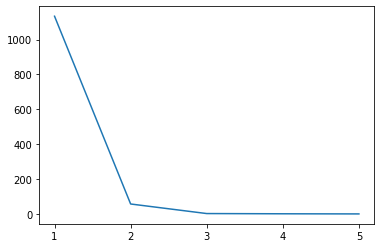

In [12]:
x_ticks = np.arange(len(pca.components_))+1
plt.xticks(x_ticks) # this enforces integers on the x-axis
plt.plot(x_ticks, pca.explained_variance_)

Similarily, you could also plot the explained variance ratio.
A full PCA without components truncated would have total explained variance ratio equal to 1.

total expained variance ratio 0.999926974772966


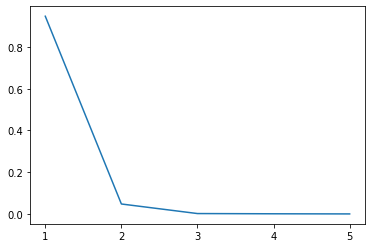

In [13]:
plt.xticks(x_ticks)
plt.plot(x_ticks, pca.explained_variance_ratio_)
print('total expained variance ratio', np.sum(pca.explained_variance_ratio_))

The above two plots show that the first component explained most of the variance present in the data. We can simply work with first 2/3 compoents. 

## Conclusion

In this lab we learned about:
+ Apply PCA to a dataset for feature extraction.
+ Reconstruct an approximation of original dataset using principal components.
+ Eigenstructure of PCA.
+ Scree plot of PCA.